<a href="https://colab.research.google.com/github/RA2112704010029/Financial-Machine-Learning-Situation-Questions/blob/main/HOTS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION - 3:
Explain how you would use k-means clustering to categorize a set of stocks into similar groups based on their returns and volatility. Describe the process of identifying the optimal number of clusters using both the elbow method and silhouette score and include relevant Python code.

# LOAD THE DATASET

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/rochitasundar/Stock-clustering-using-ML/master/stock_data.csv")
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


# PREPROCESS THE DATASET

In [ ]:
# Extract relevant columns - Returns and Volatility
data = data[['Price Change', 'Volatility']]

In [ ]:
# Handle missing data if necessary
data.dropna(inplace=True)

In [ ]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# TRAIN, TEST AND EVALUATE THE MODEL ( different methods in K means )

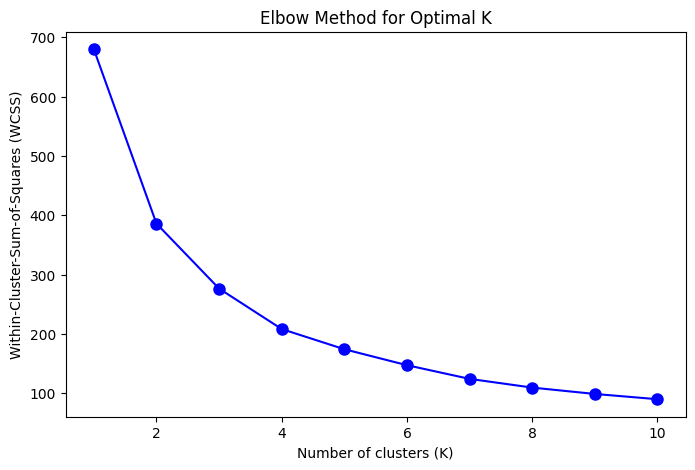

In [ ]:
# Use the Elbow Method to determine optimal K
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

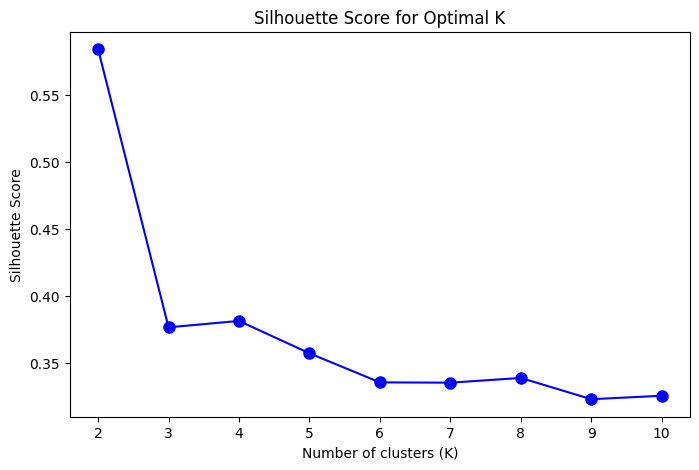

In [ ]:
# Silhouette Score Method
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(data_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, 'bo-', markersize=8)
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Final K-means Clustering with Optimal K (using Silhouette Score or Elbow Method)
optimal_k = sil_scores.index(max(sil_scores)) + 2  # Silhouette index starts at K=2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [ ]:
# Analyze the clusters
print(data.head())

   Price Change  Volatility  Cluster
0      9.999995    1.687151        1
1      8.339433    2.197887        1
2     11.301121    1.273646        1
3     13.977195    1.357679        1
4     -1.827858    1.701169        1
